In [18]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt

f = h5py.File('lms_fun_v3.hdf5','r') 
list(f.keys())
#list(f1.keys())

['matched_10_v',
 'matched_10_x',
 'matched_10_y',
 'matched_10_z',
 'matched_3_v',
 'matched_3_x',
 'matched_3_y',
 'matched_3_z',
 'mismatched_v',
 'mismatched_x',
 'mismatched_y',
 'timevarying_coefficents',
 'timevarying_v',
 'timevarying_x',
 'timevarying_y',
 'timevarying_z']

In [21]:
tv_coef=f[ 'timevarying_coefficents']
tv_x=f[ 'timevarying_x']
tv_y=f[ 'timevarying_y']
tv_z=f[ 'timevarying_z']
tv_x=np.array(tv_x)
tv_y=np.array(tv_y)
tv_z=np.array(tv_z)


In [22]:
def LMS_one(w_init,x,y):
    n_node=x.shape[0]
    err=np.zeros((n_node,1))
    w_update=np.zeros((n_node,3))
    w_update[0,:]=w_init
    for j in range(0,n_node):
        if j==0:
            err[j,0]=y[0]-w_update[j,0]*x[0]
        elif j==1:
            err[j,0]=y[1]-w_update[j,0]*x[1]-w_update[j,1]*x[0]
        else:
            err[j,0]=y[j]-w_update[j,0]*x[j]-w_update[j,1]*x[j-1]-w_update[j,2]*x[j-2]
        delta=np.array([x[j],x[j-1],x[j-2]])
        if j<500:
            w_update[j+1,:]=w_update[j,:]+ eta * err[j,0] * delta.transpose()
    return w_update

In [31]:
eta=0.05
w_init=tv_coef[0,:]
w=LMS_one(w_init,tv_x,tv_z)

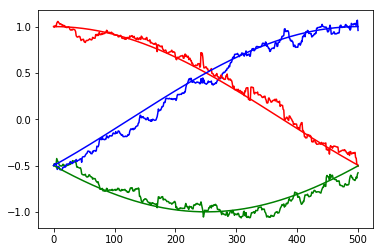

In [32]:
plt.plot(w[:,1],'g',w[:,2],'b',w[:,0],'r')
plt.plot(tv_coef[:,0],'r',tv_coef[:,1],'g',tv_coef[:,2],'b')

In [25]:
### P3.4  ###

In [17]:
mis_x=f['mismatched_x']
mis_y=f['mismatched_y']
mis_x=np.array(mis_x)
mis_y=np.array(mis_y)